## Operations on Hi-C Data 
### Author : Mareedu Mahesh Chandra

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fanc
import fanc.plotting as fancplot

### Loading example image

In [3]:
hic = fanc.load("examples/test.hic")

### Visualization of Hi-C Data

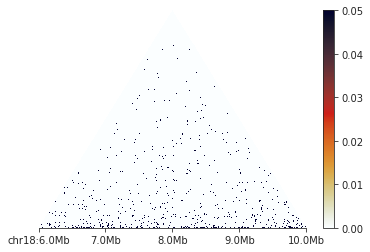

In [4]:
hp = fancplot.TriangularMatrixPlot(hic, vmax=0.05)
hp.plot('chr18:6mb-10mb')
hp.show()

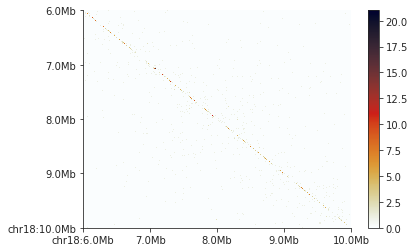

In [5]:
hp = fancplot.SquareMatrixPlot(hic)
hp.plot('chr18:6mb-10mb')
hp.show()

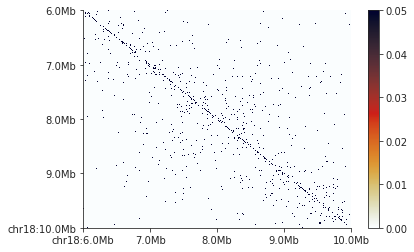

In [6]:
hp = fancplot.SquareMatrixPlot(hic, vmax=0.05)
hp.plot('chr18:6mb-10mb')
hp.show()

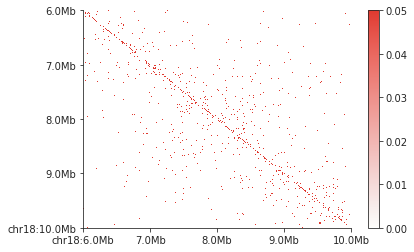

In [7]:
hp = fancplot.SquareMatrixPlot(hic, vmax=0.05, colormap='white_red')
hp.plot('chr18:6mb-10mb')
hp.show()

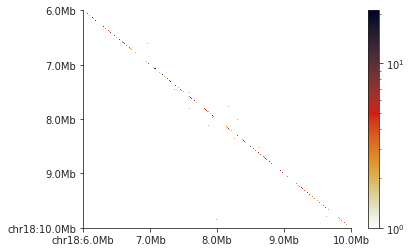

In [9]:
hp = fancplot.SquareMatrixPlot(hic, norm='log')
hp.plot('chr18:6mb-10mb')
hp.show()

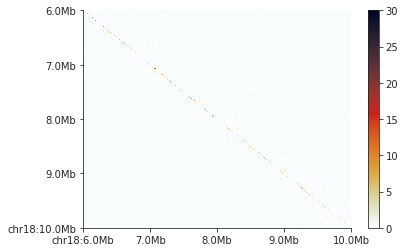

In [10]:
hp = fancplot.SquareMatrixPlot(hic, vmax=30, matrix_norm=False)
hp.plot('chr18:6mb-10mb')
hp.show()

Expected 100% (634396 of 634396) |#######| Elapsed Time: 0:00:05 Time:  0:00:05
/home/mahesh/.local/lib/python3.8/site-packages/fanc/matrix.py:2428: UserWarning: Matrix file opened in read-only mode, cannot save expected values to object. Run 'fanc expected <matrix_file>' on the command line or in Python use mode 'a' to add expected values to an existing object. The results of the current computation are not affected if you don't do this, but it will speed things up in the future.
  warnings.warn("Matrix file opened in read-only mode, "


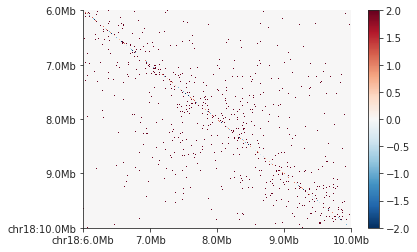

In [11]:
hp = fancplot.SquareMatrixPlot(hic, vmin=-2, vmax=2, oe=True, log=True,
                               colormap='RdBu_r')
hp.plot('chr18:6mb-10mb')
hp.show()

In [14]:
import os
os.listdir("examples")

['.DS_Store',
 'architecture',
 'bwa-index',
 'hg19_chr18_19',
 'hg19_chr18_19.fa',
 'hg19_chr18_19_re_fragments.bed',
 'hicpro',
 'SRR4271982_chr18_19_1.fastq.gzip',
 'SRR4271982_chr18_19_2.fastq.gzip',
 'test.cool',
 'test.hic']

### Tasks to-do:
        • Run Fan-C to convert raw Hi-C sequences to a Hi-C matrix
                • https://github.com/vaquerizaslab/fanc
        • Find other tools that will convert raw sequences into a Hi-C matrix
        • Read and make a presentation that summarizes this paper
                • https://arxiv.org/pdf/2203.12742.pdf

### Run Fan-C to convert raw Hi-C sequences to a Hi-C matrix

### Generating Hi-C matrices with fanc

#### Notes
1. **fanc auto** command is to  convert any input to binned Hi-C matrices. 
2. 

**usage**: 

fanc auto [-h] [-g GENOME] [-r RESTRICTION_ENZYME] [-i GENOME_INDEX]\
                 [-n BASENAME] [-s STEP_SIZE] [-b BIN_SIZES [BIN_SIZES ...]]\
                 [-t THREADS] [--fanc-parallel] [--split-fastq] [--memory-map]\
                 [--ice] [--norm-method NORM_METHOD] [-q QUALITY_CUTOFF]\
                 [--iterative-quality-cutoff ITERATIVE_QUALITY_CUTOFF]\
                 [--le-inward-cutoff INWARD_CUTOFF]\
                 [--le-outward-cutoff OUTWARD_CUTOFF] [--auto-le-cutoff]\
                 [-tmp] [--iterative] [--no-sam-sort] [--restore-coverage]\
                 [--split-ligation-junction] [--no-filter-pairs] [--no-hic]\
                 [--run-with RUN_WITH] [--job-prefix JOB_PREFIX]\
                 [--grid-startup-commands GRID_STARTUP_COMMANDS]\
                 [--grid-cleanup-commands GRID_CLEANUP_COMMANDS] [-f]\
                 input [input ...] output_folder \

Source : https://vaquerizaslab.github.io/fanc/fanc-executable/fanc-generate-hic/fanc_auto.html#

### Code to Convert single HI-C Sequence to Map

In [27]:
import subprocess

command = "fanc auto examples/test.hic ./example_output/"

ret = subprocess.run(command, capture_output=True, shell=True)

print(ret.stdout.decode())

In [29]:
print(ret)

CompletedProcess(args='fanc auto examples/test.hic ./example_output/', returncode=0, stdout=b'', stderr=b'2022-05-28 16:31:39,738 INFO FAN-C version: 0.9.24\n2022-05-28 16:31:39,752 INFO Output folder: ./example_output/\n2022-05-28 16:31:39,752 INFO Input files: examples/test.hic\n2022-05-28 16:31:39,752 INFO Input file types: hic\n2022-05-28 16:31:39,752 INFO Final basename: test (you can change this with the -n option!)\n2022-05-28 16:31:39,752 INFO Creating output folders...\n2022-05-28 16:31:48,339 INFO FAN-C version: 0.9.24\n2022-05-28 16:31:48,740 INFO Binning Hic file (5000000)\n2022-05-28 16:31:48,740 INFO Constructing binned genome...\n2022-05-28 16:31:49,821 INFO Binning edges...\n2022-05-28 16:31:50,015 INFO Binning Hi-C contacts\n2022-05-28 16:31:50,857 INFO Launching processes\n2022-05-28 16:31:59,962 INFO Submitting partitions\n2022-05-28 16:31:59,971 INFO Collecting results\n\rBinning   0% (0 of 1) |                  | Elapsed Time: 0:00:00 ETA:  --:--:--\rBinning 100% (

### Ouput
- Hi-C Maps at various resolutions

In [43]:
import os
os.listdir("example_output/hic/binned")

['test_100kb.hic',
 'test_10kb.hic',
 'test_1mb.hic',
 'test_250kb.hic',
 'test_25kb.hic',
 'test_2mb.hic',
 'test_500kb.hic',
 'test_50kb.hic',
 'test_5kb.hic',
 'test_5mb.hic']

### Code to Convert  HI-C fastq Sequences to Map

Note : As the process was taking more time and notebook was turning slow,ran it in shell,saved the log in a file. Below is the same.

In [19]:
import subprocess

# !fanc auto SRR4271982_chr18_19_1.fastq.gzip SRR4271982_chr18_19_2.fastq.gzip \
#           ./example_output/ -i bwa-index/hg19_chr18_19.fa \
#           -g hg19_chr18_19_re_fragments.bed

### Equivalent Python code

command = "cd examples; fanc auto SRR4271982_chr18_19_1.fastq.gzip SRR4271982_chr18_19_2.fastq.gzip \
          ./example_output/ -i bwa-index/hg19_chr18_19.fa \
          -g hg19_chr18_19_re_fragments.bed"

ret = subprocess.run(command, capture_output=True, shell=True)



print(ret.stdout.decode())

In [61]:
with open("log.log") as f:
    print(f.read())
    

mahesh@WINDOWS-KMOT8DP:/mnt/c/Users/user1/Documents/Hi-C Classification/examples$ fanc auto SRR4271982_chr18_19_1.fastq.gzip SRR4271982_chr18_19_2.fastq.gzip           ./example_output/ -i bwa-index/hg19_chr18_19.fa           -g hg19_chr18_19_re_fragments.bed
2022-05-28 14:46:18,582 INFO FAN-C version: 0.9.24
2022-05-28 14:46:18,618 INFO Getting regions
2022-05-28 14:46:18,633 INFO Output folder: ./example_output/
2022-05-28 14:46:18,633 INFO Input files: SRR4271982_chr18_19_1.fastq.gzip, SRR4271982_chr18_19_2.fastq.gzip
2022-05-28 14:46:18,634 INFO Input file types: fastq, fastq
2022-05-28 14:46:18,634 INFO Final basename: SRR4271982_chr18_19 (you can change this with the -n option!)
2022-05-28 14:46:18,634 INFO Creating output folders...
2022-05-28 14:46:22,079 INFO FAN-C version: 0.9.24
2022-05-28 14:46:22,094 INFO Starting mapping for SRR4271982_chr18_19_1.fastq.gzip
2022-05-28 14:46:22,153 INFO Starting to output alignments to intermediate SAM file /tmp/tmpm_j03tem/intermediate.sa

### Analysis

In [62]:
import fanc
import fanc.plotting as fancplot
import matplotlib.pyplot as plt

hic_5mb = fanc.load("examples/example_output/hic/binned/SRR4271982_chr18_19_5mb.hic")

In [63]:
ab = fanc.ABCompartmentMatrix.from_hic(hic_5mb)
ab_chr18 = ab.matrix(('chr18', 'chr18'))

AB 100% (2 of 2) |#######################| Elapsed Time: 0:00:00 Time:  0:00:00
Buffers 100% (1 of 1) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
Expected 100% (214 of 214) |#############| Elapsed Time: 0:00:00 Time:  0:00:00


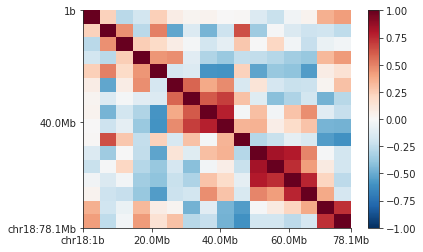

In [64]:
fig, ax = plt.subplots()
mp = fancplot.SquareMatrixPlot(ab, ax=ax,
                           norm='lin', colormap='RdBu_r',
                           vmin=-1, vmax=1,
                           draw_minor_ticks=False)
mp.plot('chr18')
plt.show()

### Eigen vectors

In [65]:
ev = ab.eigenvector()

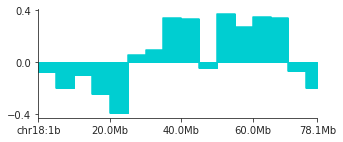

In [66]:
fig, ax = plt.subplots(figsize=(5, 2))
lp = fancplot.LinePlot(ab, colors=['darkturquoise'])
lp.plot('chr18')
plt.show()

### Enrichment profiles (Saddle plot)


2022-05-28 19:06:26,869 INFO Generating profile...
2022-05-28 19:06:26,888 INFO Using GC content to orient eigenvector...


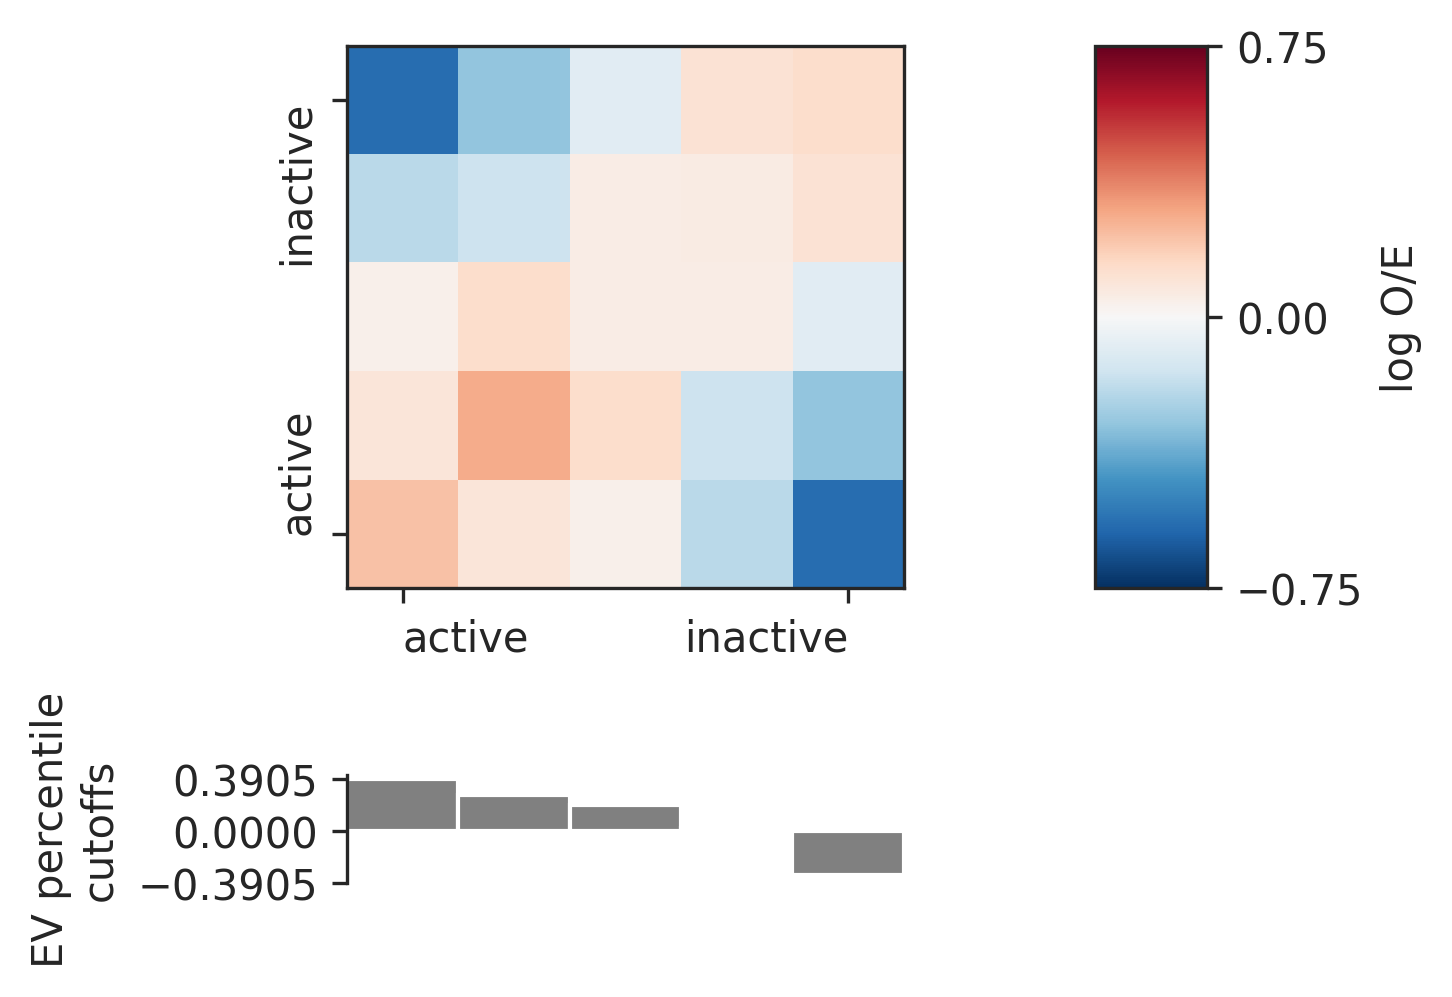

In [67]:
profile, cutoffs = ab.enrichment_profile(hic_1mb, genome='hg19_chr18_19.fa')
fig, axes = fancplot.saddle_plot(profile, cutoffs)

### PCA

In [69]:
import fanc
import fanc.plotting as fancplot
from fanc.architecture.comparisons import hic_pca

lowc_hindiii_100k = fanc.load("examples/architecture/other-hic/lowc_hindiii_100k_1mb.hic")
lowc_hindiii_5M = fanc.load("examples/architecture/other-hic/lowc_hindiii_5M_1mb.hic")
lowc_mboi_1M = fanc.load("examples/architecture/other-hic/lowc_mboi_1M_1mb.hic")
lowc_mboi_100k = fanc.load("examples/architecture/other-hic/lowc_mboi_100k_1mb.hic")
lowc_mboi_50k = fanc.load("examples/architecture/other-hic/lowc_mboi_50k_1mb.hic")

In [70]:
pca_info, pca_result = hic_pca(lowc_hindiii_5M, lowc_hindiii_100k,
                               lowc_mboi_1M, lowc_mboi_50k,
                               lowc_mboi_100k, ignore_zeros=True,
                               scale=False, region='chr19', sample_size=100000,
                               strategy='variance')

Edge collection 100% (13964612 of 13964612) || Elapsed Time: 0:00:00 Time:  0:00:00
2022-05-28 19:08:01,163 INFO Valid edges: 1770/1770
2022-05-28 19:08:01,343 INFO Variance explained: [8.69079856e-01 1.12265450e-01 1.67886424e-02 1.86605135e-03
 7.93826954e-32]


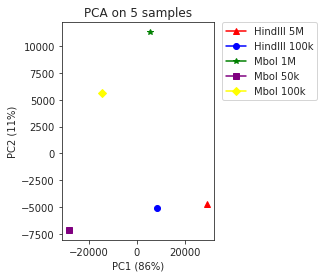

In [71]:
fig, ax = fancplot.pca_plot(pca_result, variance=pca_info,
                            names=["HindIII 5M", "HindIII 100k",
                                   "MboI 1M", "MboI 50k", "MboI 100k"])

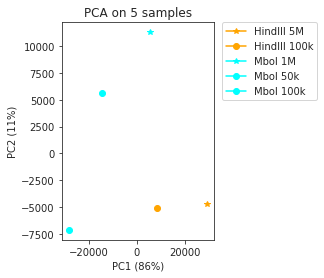

In [72]:
fig, ax = fancplot.pca_plot(pca_result, variance=pca_info,
                            names=["HindIII 5M", "HindIII 100k",
                                   "MboI 1M", "MboI 50k", "MboI 100k"],
                            colors=["orange", "orange", "cyan", "cyan", "cyan"],
                            markers=["*", "o", "*", "o", "o"])

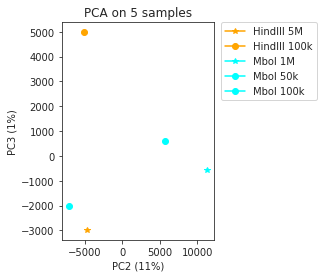

In [73]:
fig, ax = fancplot.pca_plot(pca_result, variance=pca_info,
                            eigenvectors=(1, 2),
                            names=["HindIII 5M", "HindIII 100k",
                                   "MboI 1M", "MboI 50k", "MboI 100k"],
                            colors=["orange", "orange", "cyan", "cyan", "cyan"],
                            markers=["*", "o", "*", "o", "o"])

### References

[1] https://vaquerizaslab.github.io/fanc/index.html

[2] https://github.com/XiaoTaoWang

### Other tools 

1. runHiC - https://pypi.org/project/runHiC/